In [260]:
import numpy as np
import random

from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms.functional as TF

from torchgeo.datasets import LoveDA

In [261]:
path='/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/LoveDA'

In [270]:
love_train = LoveDA(
    root=path, 
    split='train', 
    scene=['urban', 'rural'], 
    transforms=None, 
    download=True, 
    checksum=False)

love_val = LoveDA(
    root=path, 
    split='val', 
    scene=['urban', 'rural'], 
    transforms=None, 
    download=True, 
    checksum=False)

print(f"""
      Train data: {len(love_train)}
      Validation data: {len(love_val)}
      """)

train
Files already downloaded and verified
val
Files already downloaded and verified

      Train data: 2522
      Validation data: 1669
      


In [263]:
rand_idx = random.randint(0, len(love_train))

In [264]:
img = love_train[rand_idx]['image']
mask = love_train[rand_idx]['mask']

#### Labels:

- unknown - 0
- background – 1
- building – 2
- road – 3
- water – 4
- barren – 5
- forest – 6
- agriculture – 7

In [265]:
RGB_classes = [
       (0, 0, 0),
       (255, 255, 225),
       (255,  0, 255),
       (255, 0, 0),
       (0,  0,  255), 
       (128, 128, 128),
       (0, 130, 0),
       (255, 200, 0)]

idx2rgb = {key: value for key, value in enumerate(RGB_classes)}

In [266]:
# Create the RGB tensor
rgb_tensor = torch.zeros((img.shape), dtype=torch.uint8)
for index in idx2rgb:
    for channel, color in enumerate(idx2rgb[index]):
        rgb_tensor[channel][mask == index] = color

In [267]:
transform = torchvision.transforms.ToPILImage()

image = transform(img)
mask_img = transform(rgb_tensor)

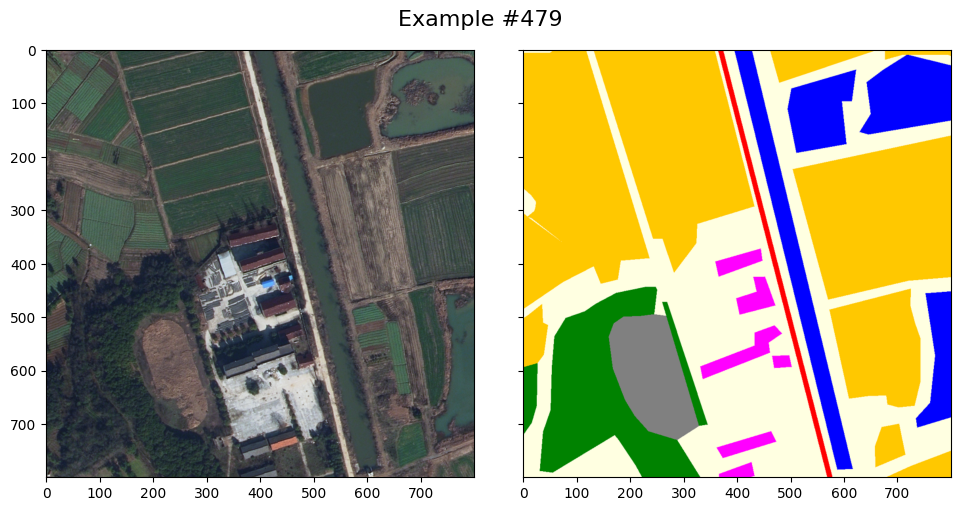

In [268]:
im1 = image.resize((800, 800))
im2 = mask_img.resize((800, 800))

f, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax[0].imshow(im1)
ax[1].imshow(im2)

f.suptitle(f"Example #{rand_idx}", fontsize=16)
f.tight_layout()

plt.show()